In [23]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# check current working directory
print('before the working directory',os.getcwd())

# Set working directory
path = r'K:\Essex\CE802_Machine Learning\CE802_P2_Data'
os.chdir(path)

print('current working directory', os.getcwd())

before the working directory K:\Essex\CE802_Machine Learning\CE802_P2_Data
current working directory K:\Essex\CE802_Machine Learning\CE802_P2_Data


In [25]:
# load the training dataset
train_data = pd.read_csv('CE802_P2_Data.csv')

In [26]:
# Check for missing values
train_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

In [27]:
# Drop the Null value
train_data.dropna(axis=1, inplace=True)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   int64  
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  Class   1000 non-null   bool   
dtypes: bool(1), float64(17), int64(2)
memory usage: 149.5 KB


In [29]:
# Split the train and test data
X= train_data.drop('Class', axis=1)
y = train_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create a correlation matrix
cor = X.corr()
cor

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
F1,1.000000,-0.001481,0.043066,0.009438,-0.003345,0.018811,0.040049,-0.014832,-0.018222,-0.011183,0.029807,0.015329,-0.287894,-0.021865,0.003312,-0.014486,0.092579,-0.023085,-0.008624
F2,-0.001481,1.000000,-0.012867,-0.236772,0.027001,0.033943,0.001082,-0.063753,0.020217,0.027008,-0.002111,-0.011520,0.006406,-0.091842,-0.000217,-0.053769,0.045806,0.041286,0.037088
F3,0.043066,-0.012867,1.000000,-0.011496,-0.016127,-0.018403,0.040851,0.036978,-0.007382,-0.000995,0.014355,0.014457,0.019447,0.023503,0.013230,0.010850,-0.033731,-0.030457,-0.002559
F4,0.009438,-0.236772,-0.011496,1.000000,-0.052302,0.000484,-0.007325,-0.031391,0.003868,0.005760,0.014594,0.059413,0.122382,0.003971,-0.003992,-0.006837,-0.006606,-0.028827,0.010592
F5,-0.003345,0.027001,-0.016127,-0.052302,1.000000,0.011350,-0.011213,0.060880,-0.012625,-0.022825,-0.020058,-0.070234,-0.047216,0.085860,0.040642,0.026561,-0.020582,0.064833,-0.042076
F6,0.018811,0.033943,-0.018403,0.000484,0.011350,1.000000,0.004519,-0.044801,0.012361,0.213338,-0.037730,-0.034931,-0.123040,0.050463,-0.004537,-0.022679,-0.012279,0.007732,0.238497
F7,0.040049,0.001082,0.040851,-0.007325,-0.011213,0.004519,1.000000,0.018169,0.006362,0.009086,0.008111,0.075142,-0.043781,-0.005987,0.026755,0.044135,0.043627,-0.013948,0.005228
F8,-0.014832,-0.063753,0.036978,-0.031391,0.060880,-0.044801,0.018169,1.000000,0.020361,-0.041041,-0.002052,0.050582,-0.296979,0.021028,-0.037528,-0.040083,0.021133,-0.000216,-0.254483
F9,-0.018222,0.020217,-0.007382,0.003868,-0.012625,0.012361,0.006362,0.020361,1.000000,-0.042713,-0.049179,0.035314,-0.001953,-0.019388,-0.014276,-0.005679,0.018965,0.074935,0.024747
F10,-0.011183,0.027008,-0.000995,0.005760,-0.022825,0.213338,0.009086,-0.041041,-0.042713,1.000000,0.045470,-0.068430,0.042462,0.052393,-0.042789,0.055473,-0.037891,0.048212,-0.000167


<AxesSubplot:>

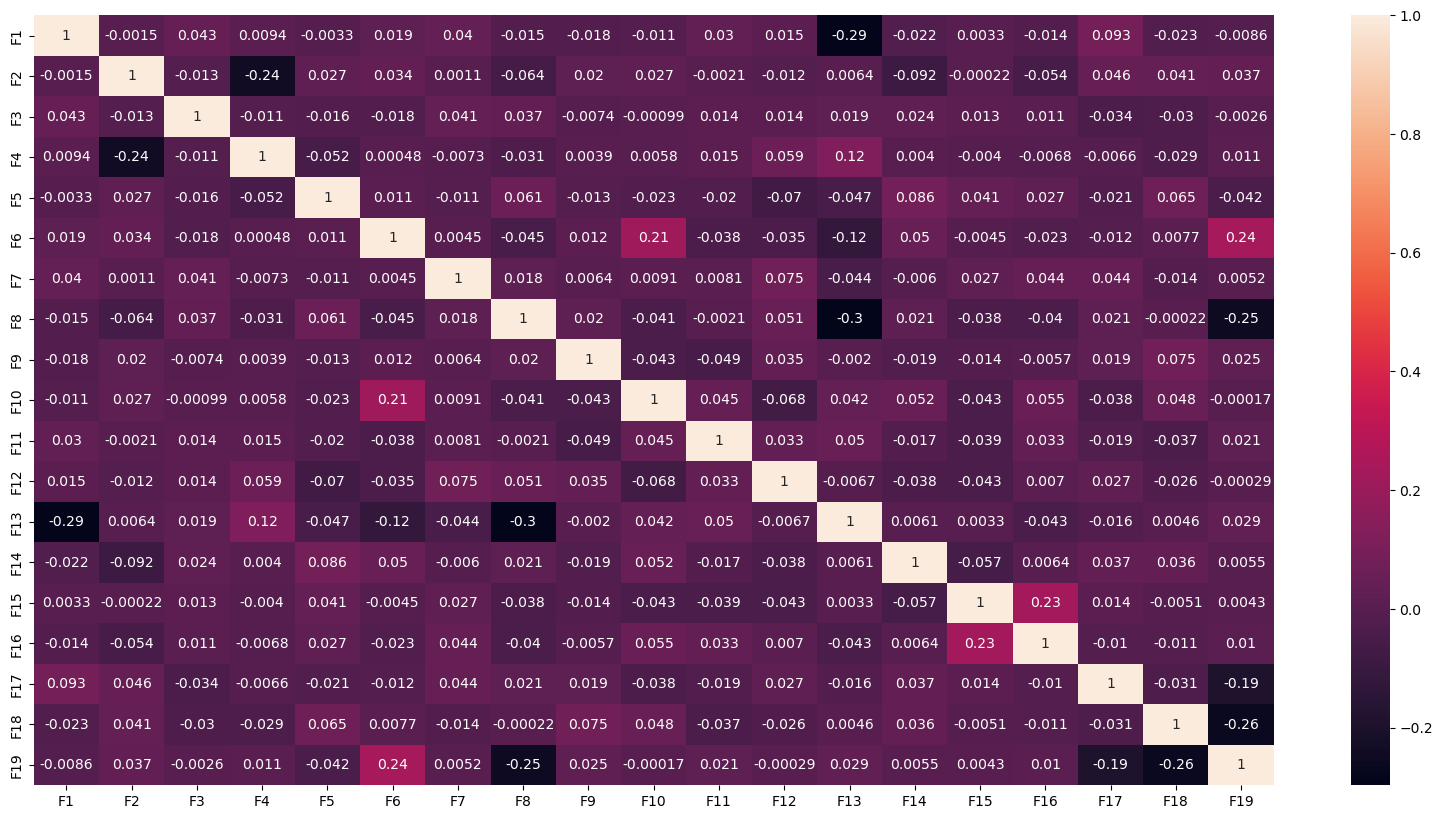

In [31]:
# Plotting the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot = True)

In [32]:
# Using standard Scalar to fit_transform
scalar = StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

In [33]:
# Using Decision Tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_scalar, y_train)
tree_pred = tree_classifier.predict(X_test_scalar)
tree_score = accuracy_score(y_test, tree_pred)
print("Accuracy when using Decision Tree accuracy:", tree_score)

Accuracy when using Decision Tree accuracy: 0.85


In [34]:
# Using Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scalar, y_train)
rf_pred = rf_classifier.predict(X_test_scalar)
rf_score = accuracy_score(y_test, rf_pred)
print("Accuracy when using Random Forest accuracy:", rf_score)

Accuracy when using Random Forest accuracy: 0.86


In [35]:
# Initiate the parameter grid
grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

In [36]:
# Using Gradient Boosting Machine classifier with GridSearchCV
gbm_classifier = GradientBoostingClassifier()
gbmgrid = GridSearchCV(gbm_classifier, param_grid=grid, cv=5)
gbmgrid.fit(X_train_scalar, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", gbmgrid.best_params_)
print("GBM Accuracy score:", gbmgrid.best_score_)

# Predict the model
gbm_pred = gbmgrid.predict(X_test_scalar)
gbm_score = accuracy_score(y_test, gbm_pred)
print("Accuracy when using Gradient Boosting Machine with GridSearchCV:", gbm_score)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
GBM Accuracy score: 0.89875
Accuracy when using Gradient Boosting Machine with GridSearchCV: 0.895


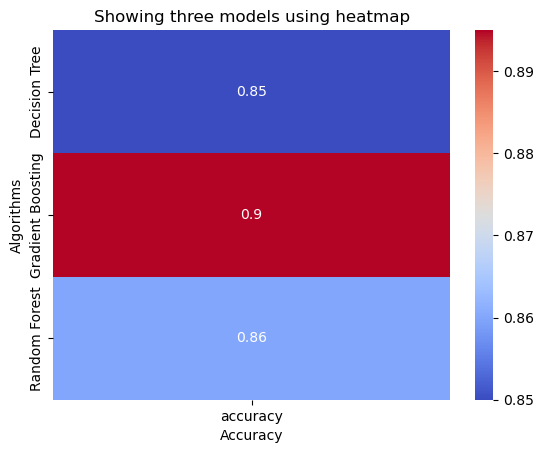

In [37]:

# Make a list of models and accuracy scores
algorithms = ['Random Forest', 'Decision Tree', 'Gradient Boosting' ]
acc_values = [rf_score, tree_score, gbm_score]

# Create a data frame with accuracy numbers and algorithms.
plot_df = pd.DataFrame({'Algorithms': algorithms, 'accuracy': acc_values})

# Create a pivot table with accuracy numbers as columns and algorithms as rows.
p_table = plot_df.pivot_table(index='Algorithms', values='accuracy', aggfunc=np.median)

# Using heatmap
sns.heatmap(p_table, annot=True, cmap='coolwarm')

# Labels and titles
plt.xlabel('Accuracy')
plt.title('Showing three models using heatmap')

# show the plot
plt.show()


In [38]:
# Read the train data set
p2_train = pd.read_csv('CE802_P2_Data.csv')

# Read the test data set
p2_test = pd.read_csv('CE802_P2_Test.csv')

In [39]:
# Drop the null F20 column from train data set
p2_train.drop('F20', axis=1, inplace=True)

In [40]:
# Split the training data into features and labels, and then remove the Class column.
X_train = p2_train.drop('Class', axis=1)
y_train = p2_train['Class']

In [41]:
# Using Scalar
scalar = StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)

In [42]:
# Drop the F20 column from test data set since it has null values
p2_test_F20 = p2_test['F20']
p2_test.drop('F20', axis=1, inplace=True)

In [43]:
# Drop the class value from test dataset and using scalar to transform the data
X_test = p2_test.drop('Class', axis=1)
X_test_scalar = scalar.transform(X_test)

In [44]:
# On the entire training set, train a classifier using a gradient boosting machine.
gbm = GradientBoostingClassifier()
gbm.fit(X_train_scalar, y_train)

# Predict the test set's class designations.
y_pred = gbm.predict(X_test_scalar)

#Add the F20 column again to the generate output file
p2_test.insert(19, 'F20', p2_test_F20)

#In the test data, replace projected labels with missing Class values.
p2_test['Class'] = y_pred

# Generate the out csv file
p2_test.to_csv('CE802_P2_Test_Predictions.csv', index=False)
print('Output csv file has been generated successfully!')

Output csv file has been generated successfully!


In [45]:
p2_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,2.6697,13.4460,0,2378.28,1.87750,-7881.147,-9.2598,-1999.76,-43.500,-3.5567,...,-0.96,-7461.5,0,-4.6410,3101.10,12681.740,19.3890,-314.174,NaN,True
1,4.1930,7.3222,1,3039.66,1.29998,-10812.780,-7.2342,-2827.57,-46.321,-3.5368,...,-0.96,-6598.5,1,-3.5715,1923.60,12677.800,10.6086,-205.220,NaN,True
2,5.0550,11.4320,1,2491.92,1.28775,-6713.580,-7.4682,-2190.17,-45.364,-3.7054,...,-0.96,-7049.7,1,-7.1520,2066.91,12845.210,18.1350,-261.360,NaN,True
3,3.8580,8.4736,0,2145.75,1.60500,-4804.980,-10.4250,-2041.38,-63.730,-3.5638,...,-0.96,-7558.3,1,-4.6740,2774.70,12946.660,10.6374,-73.200,NaN,True
4,3.0388,7.4472,0,2124.63,1.46770,-8079.630,-9.2001,-676.17,-50.752,-4.5310,...,-1.96,-7469.3,1,-2.2890,5768.10,12839.148,11.4141,-379.440,NaN,False
